# Lab_08

In [2]:
import scipy as sp
import numpy as np
x = np.linspace(0,5,50)
Y = ((x-1)**2)/(3+1)
sp.integrate.trapezoid(Y,x)

5.418835901707622

In [16]:
import pandas as pd
t=np.array([1.00,1.01,1.02,1.03,1.04])
i=np.array([3.10,3.12,3.14,3.18,3.24])

voltio = {'Tiempo (s)':t, 'Corriente (A)':i}
DataE = pd.DataFrame(voltio)
DataE

,Tiempo (s),Corriente (A)
0,1.00,3.10
1,1.01,3.12
2,1.02,3.14
3,1.03,3.18
4,1.04,3.24


In [19]:
L=0.98
R=0.142

dI = np.gradient(i, t)
dI

e = L*dI + R*i
DataE['fem (V)'] = e
DataE

,Tiempo (s),Corriente (A),fem (V)
0,1.00,3.10,2.40020
1,1.01,3.12,2.40304
2,1.02,3.14,3.38588
3,1.03,3.18,5.35156
4,1.04,3.24,6.34008


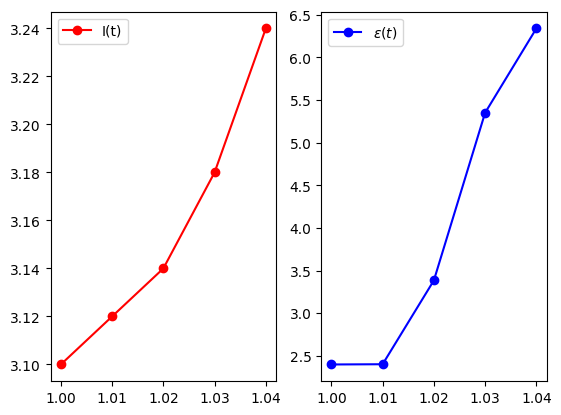

In [24]:
fig, axs = plt.subplots(1, 2)

axs[0].plot(DataE['Tiempo (s)'], DataE['Corriente (A)'], 'ro-', label = 'I(t)')
axs[0].legend()
axs[1].plot(DataE['Tiempo (s)'], DataE['fem (V)'], 'bo-', label = '$ε(t)$')
axs[1].legend()

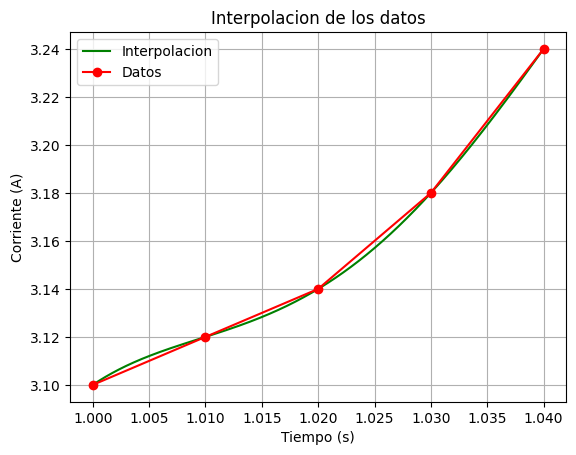

In [25]:
l = sp.interpolate.lagrange(t, i)

x = np.linspace(np.min(t), np.max(t), 1000)

plt.title('Interpolacion de los datos')
plt.plot(x, l(x), 'g', label = 'Interpolacion')
plt.plot(t,i, 'ro-', label = 'Datos')
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.legend()
plt.grid()

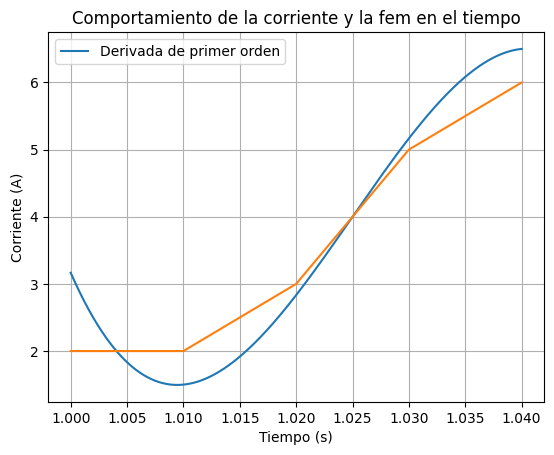

In [29]:
def diff_f(f, x, h):

  d = (-25*f(x) + 48*f(x+h)- 36*f(x+2*h) + 16*f(x+3*h) -3*f(x+4*h))/(12*h)

  return d

d = diff_f(l, x, x[1]-x[0])

plt.title('Comportamiento de la corriente y la fem en el tiempo')
plt.plot(x, d, label = 'Derivada de primer orden')
plt.plot(t, dI)
plt.xlabel('Tiempo (s)')
plt.ylabel('Corriente (A)')
plt.legend()
plt.grid()

*Parte 2*

In [1]:
import numpy as np
import sympy as sy

def tan(grados):
  return np.tan(np.deg2rad(grados))

def sen(grados):
  return np.sin(np.deg2rad(grados))

def cos(grados):
  return np.cos(np.deg2rad(grados))

def intan(grados):
  return np.rad2deg(np.arctan(grados))

def insen(grados):
  return np.rad2deg(np.arcsin(grados))

def incos(grados):
  return np.rad2deg(np.arccos(grados))

def cotan(grados):
  return 1/tan(grados)


  Trapezoide($f,a,b,n$):

  $h = (b-a)/n$

  $S = (f(a)+f(b))/2$

  for $i$ in range($1,n$):
  
  $S = S+f(a + i*h)$

  return $S*h$

In [3]:
def trapezoide(f,a,b,n):
  h = (b-a)/n
  S = (f(a)+f(b))/2
  for i in range(1,n):
    S = S + f(a + i*h)
  return S*h

trapezoide(lambda x: 1/np.sqrt(np.tan(x)),0.001,np.pi/2,1000)

2.1611180044201346

In [14]:
x,y = sy.symbols('x,y')
Lala = 1/sy.sqrt(1 - y**2)
fint = sy.integrate(Lala,(y,0,sy.sin(x)))
sint = sy.lambdify(x,fint,"numpy")
trapezoide(sint,0.001,np.pi/4,1000), Simpson(sint,0.001,np.pi/4,1000), Cuadratura(sint,0.001,np.pi/4,1000)

#opoop = sy.cos(x)/x**3
#sy.integrate(opoop,(x,1,1e2))

(0.30842463753404253, 0.3084246375340425, 0.308732277773413)

In [5]:
trapezoide(lambda x: np.cos(x)/x**3,1,1e2,100000)

0.01811729151742567

In [6]:
import numpy as np
import scipy as sp
x = np.linspace(1,100,100)
sp.integrate.trapezoid(np.cos(x)/x**3,x)

0.17842136341501433

$Simpson(f,a,b,n):$

$h = (b-a)/n$

$S0 = f(a)+f(b)$

$S2=0$

$S1=0$

for $i$ in range$(1,n):$

if ($i$%2==0):
$S2 += f(a + i*h)$

else: $S1 += f(a + i*h)$

return $(S0 + 2*S2 + 4*S1)*h/3$

In [7]:

import numpy as np
def Simpson(f,a,b,n):
    h = (b - a)/n
    S0 = f(a) + 4*f(a + (n-1)*h) + f(b)
    S1 = 0
    S2 = 0
    for i in range(1,n//2):    # suma de 1, ..., n/2 - 1
        S2 += f(a + 2*i*h )    # suma de pares
        S1 += f(a + (2*i-1)*h) # suma de impares
    return (S0 + 2*S2 + 4*S1)*h/3


Simpson(lambda x: 1/np.sqrt(np.tan(x)),0.001, np.pi/2, 1000)

2.1587371660639

In [8]:
Simpson(lambda x: np.cos(x)/x**3,1,1e2,1000)

0.018146084790970848

In [10]:
Simpson(sint,0.001,np.pi/4,1000)

0.3084246375340425

$Cuadratura(f,a,b,n):$
   
   $h = (b - a)/n$
   
   $S = 0$

   for $i$ in $range(1,n+1):$

   $ S += f(a + i*h)*h $  

   return $S$

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Si la entrada es una función definida en [a,b], con n subintervalos.
def Cuadratura(f,a,b,n):
   h = (b - a)/n
   S = 0
   for i in range(1,n+1): #  range(n)=0,..,n-1
     S += f(a + i*h)*h    # I = A1 + A2 + ... + An
   return S


Cuadratura(lambda x: 1/np.sqrt(np.tan(x)),0, np.pi/2, 1000)

2.163549898494433

In [12]:
Cuadratura(lambda x: np.cos(x)/x**3,1,1e2,10000000)

0.018114415930713147

In [13]:
Cuadratura(sint,0.001,np.pi/4,1000)

0.308732277773413

*Parte 3*


In [ ]:
g = 9.8 #aceleracion de la gravedad
b = 2.98 #longitud
m = 7 # masa
I_0 = m*(b**2) # Inercia inicial

smallosis = 2*np.pi*np.sqrt(I_0/(m*g*b))
O_0, Ot = 0,np.pi/2
K = np.sin(O_0)/2
elipint = lambda Ø,K : 1/np.sqrt(1 - (K**2)*(np.sin(Ø)**2))
spelip = sp.integrate.quad(elipint,0,np.pi/2,args=(K,))[0]




P = ((2*smallosis)/np.pi) * spelip

P

3.4647744053101577

In [ ]:
sp.integrate.quad(elipint,0,np.pi/2,args=(K,))[0]

1.5707963267948966

*Parte 4*

In [ ]:
m = 0.13
m1 = 1 - m
a0 = 1.3862944
b0 = 0.5
a1 = 0.1119723
b1 = 0.1213478
a2 = 0.00725296
b2 = 0.0288729

a0 + a1*m1 + a2*m1 - (b0 + b1*m1 + b2*(m1**2))*np.log(m1) + 3e-5



1.5774270854630266

In [ ]:
sp.integrate.quad(elipint,0,np.pi/2,args=(m,))[0]

1.5774967807286575

*Parte 5*

Text(0, 0.5, 'A(r, θ)')

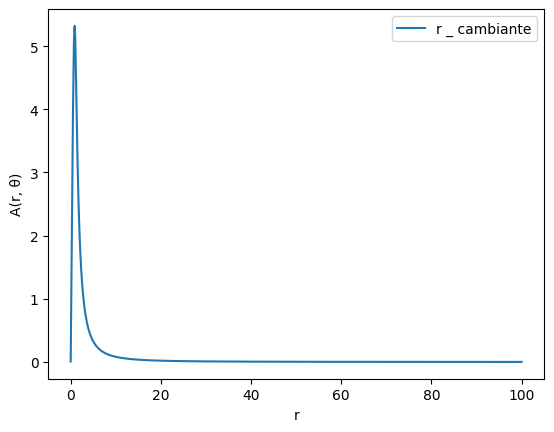

In [ ]:
hx = lambda Ø,K: np.sqrt(1 - (K**2)*(np.sin(Ø)**2))

def KK(k,f):
  I = sp.integrate.quad(f, 0, np.pi/2, args=(k, ))[0]
  return I

def E(k,g):
  I = sp.integrate.quad(g, 0, np.pi/2, args=(k, ))[0]
  return I

def k_cuadrado(r,theta,a ):
  n = 4*a*r*np.sin(theta)
  d = a**2+r**2+2*a*r*np.sin(theta)
  return n/d

def Apotencial(r, theta, a, I):
  n = 4*I*a
  d = np.sqrt(a**2+r**2+2*a*r*np.sin(theta))
  PT = n/d
  k_2 = k_cuadrado(r,theta,a )
  k = np.sqrt(k_2)
  ST = (((2-k_2)* KK(k,elipint)) - 2*E(k,hx))/k_2

  A = PT*ST
  return   A


a=1
I=3
r=np.linspace(0.001,100,1000)
A = np.zeros(len(r))
for i, r_  in enumerate(r):
  A[i] = Apotencial(r_, np.pi/3, a, I)

plt.plot(r,A, label = "r _ cambiante")
plt.legend()
plt.xlabel("r")
plt.ylabel("A(r, θ)")


Text(0, 0.5, 'A(r, θ)')

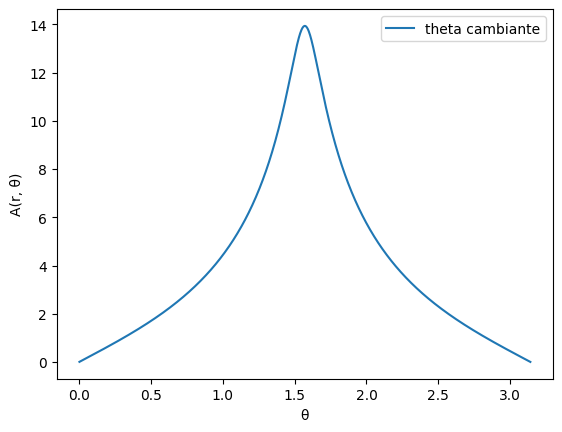

In [ ]:
a=1
I=3
O=np.linspace(0.001, np.pi,1000)
A = np.zeros(len(O))
r = 1.1
for i, O_  in enumerate(O):
  A[i] = Apotencial(r,O_, a, I)

plt.plot(O,A, label = "theta cambiante")
plt.legend()
plt.xlabel("θ")
plt.ylabel("A(r, θ)")